<a href="https://colab.research.google.com/github/altn714/ESAA/blob/main/LAB3_Linear_system_and_matrix(%EB%82%B4_%ED%95%84%EA%B8%B0).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 3: Linear System and Matrix

# Solving Linear Systems

In [14]:
#inverse로 해 풀기
import numpy as np
A = np.array([[1,2,1], [1,-2,1], [2,3,-1]])
b = np.array( [ [4], [5], [1.0]   ])
print(A) 
print(b)

detA=np.linalg.det(A) #det 0아님

#해 구하기
x = np.linalg.inv(A) @ b
print(x)

[[ 1  2  1]
 [ 1 -2  1]
 [ 2  3 -1]]
[[4.]
 [5.]
 [1.]]
[[ 2.08333333]
 [-0.25      ]
 [ 2.41666667]]


In [13]:
#cramer's rule
A1 = np.array([[4,2,1], [5,-2,1], [1,3,-1]])
print(A1)

x1 = 1/detA * np.linalg.det(A1)
print(x1)

[[ 4  2  1]
 [ 5 -2  1]
 [ 1  3 -1]]
2.083333333333332


In [38]:
#HW3-2 2번 
A=np.array([[2,1,1],[1,3,-2],[7,-6,1]])
print(A)
b1=np.array([[4],[2],[2]])
#또는 
b2=np.array([[4,2,2]]).T
print(b1)
print(b2)

print(np.linalg.det(A)) #0아님

#inverse
x= np.linalg.inv(A)@b
print(x)

#cramer's rule
A1=np.array([[4,1,1],[2,3,-2],[2,-6,1]])
print(np.linalg.det(A1)/np.linalg.det(A)) #x1

A2=np.array([[2,4,1],[1,2,-2],[7,2,1]])
print(np.linalg.det(A2)/np.linalg.det(A)) #x2

A3=np.array([[2,1,4],[1,3,2],[7,-6,2]])
print(np.linalg.det(A3)/np.linalg.det(A)) #x3

[[ 2  1  1]
 [ 1  3 -2]
 [ 7 -6  1]]
[[4]
 [2]
 [2]]
[[4]
 [2]
 [2]]
-59.999999999999986
[1. 1. 1.]
1.0
1.0
1.0


In [33]:
#A 쉽게 인덱싱
A1[:,0]=np.array([4,2,2]) #차원 하나 줄어들게 slicing됨
A1[:,0:1]=np.array([[4],
                    [2],
                    [2]])

A1==A1

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [ ]:
A1[:,1:2]=np.array([[4],
                    [2],
                    [2]])
A1

In [ ]:
A1[:,2:]=np.array([[4],
                    [2],
                    [2]])
A1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
%matplotlib inline

## Linear Systems

A [linear system of equations](https://en.wikipedia.org/wiki/System_of_linear_equations) is a collection of linear equations

\begin{align}
a_{0,0}x_0 + a_{0,1}x_2 + \cdots + a_{0,n}x_n & = b_0 \\\
a_{1,0}x_0 + a_{1,1}x_2 + \cdots + a_{1,n}x_n & = b_1 \\\
& \vdots \\\
a_{m,0}x_0 + a_{m,1}x_2 + \cdots + a_{m,n}x_n & = b_m \\\
\end{align}

In matrix notation, a linear system is $A \mathbf{x}= \mathbf{b}$ where

$$
A = \begin{bmatrix}
a_{0,0} & a_{0,1} & \cdots & a_{0,n} \\\
a_{1,0} & a_{1,1} & \cdots & a_{1,n} \\\
\vdots & & & \vdots \\\
a_{m,0} & a_{m,1} & \cdots & a_{m,n} \\\
\end{bmatrix}
 \ \ , \ \
\mathbf{x} = \begin{bmatrix}
x_0 \\\ x_1 \\\ \vdots \\\ x_n
\end{bmatrix}
 \ \ , \ \
\mathbf{b} = \begin{bmatrix}
b_0 \\\ b_1 \\\ \vdots \\\ b_m
\end{bmatrix} 
$$

## Gaussian elimination

The general procedure to solve a linear system of equation is called [Gaussian elimination](https://en.wikipedia.org/wiki/Gaussian_elimination). The idea is to perform elementary row operations to reduce the system to its row echelon form and then solve.

### Elementary Row Operations

[Elementary row operations](https://en.wikipedia.org/wiki/Elementary_matrix#Elementary_row_operations) include:

1. Add $k$ times row $j$ to row $i$.
2. Multiply row $i$ by scalar $k$.
3. Switch rows $i$ and $j$.

Each of the elementary row operations is the result of matrix multiplication by an elementary matrix (on the left).
To add $k$ times row $i$ to row $j$ in a matrix $A$, we multiply $A$ by the matrix $E$ where $E$ is equal to the identity matrix except the $i,j$ entry is $E_{i,j} = k$. For example, if $A$ is 3 by 3 and we want to add 3 times row 2 to row 0 (using 0 indexing) then

$$
E_1 = \begin{bmatrix}
1 & 0 & 3 \\\
0 & 1 & 0 \\\
0 & 0 & 1
\end{bmatrix}
$$

Let's verify the calculation:

In [ ]:
A = np.array([[1,1,2],[-1,3,1],[0,5,2]])
print(A)

[[ 1  1  2]
 [-1  3  1]
 [ 0  5  2]]


In [ ]:
E1 = np.array([[1,0,3],[0,1,0],[0,0,1]])
print(E1)

[[1 0 3]
 [0 1 0]
 [0 0 1]]


In [ ]:
E1 @ A #R1+3*R3

array([[ 1, 16,  8],
       [-1,  3,  1],
       [ 0,  5,  2]])

To multiply $k$ times row $i$ in a matrix $A$, we multiply $A$ by the matrix $E$ where $E$ is equal to the identity matrix except the $,i,j$ entry is $E_{i,i} = k$. For example, if $A$ is 3 by 3 and we want to multiply row 1 by -2 then

$$
E_2 = \begin{bmatrix}
1 & 0 & 0 \\\
0 & -2 & 0 \\\
0 & 0 & 1
\end{bmatrix}
$$

Let's verify the calculation:

In [ ]:
E2 = np.array([[1,0,0],[0,-2,0],[0,0,1]])
print(E2)

[[ 1  0  0]
 [ 0 -2  0]
 [ 0  0  1]]


In [ ]:
E2 @ A

array([[ 1,  1,  2],
       [ 2, -6, -2],
       [ 0,  5,  2]])

Finally, to switch row $i$ and row $j$ in a matrix $A$, we multiply $A$ by the matrix $E$ where $E$ is equal to the identity matrix except $E_{i,i} = 0$, $E_{j,j} = 0$, $E_{i,j} = 1$ and $E_{j,i} = 1$. For example, if $A$ is 3 by 3 and we want to switch row 1 and row 2 then

$$
E3 = \begin{bmatrix}
1 & 0 & 0 \\\
0 & 0 & 1 \\\
0 & 1 & 0
\end{bmatrix}
$$

Let's verify the calculation:

In [ ]:
E3 = np.array([[1,0,0],[0,0,1],[0,1,0]])
print(E3)

[[1 0 0]
 [0 0 1]
 [0 1 0]]


In [ ]:
E3 @ A #2행 3행 바뀜

array([[ 1,  1,  2],
       [ 0,  5,  2],
       [-1,  3,  1]])

In [ ]:
A

array([[ 1,  1,  2],
       [-1,  3,  1],
       [ 0,  5,  2]])

### Implementation <--이거

Let's write function to implement the elementary row operations. First of all, let's write a function called `add_rows` which takes input parameters $A$, $k$, $i$ and $j$ and returns the NumPy array resulting from adding $k$ times row $j$ to row $i$ in the matrix $A$. If $i=j$, then let's say that the function scales row $i$ by $k+1$ since this would be the result of $k$ times row $i$ added to row $i$.

In [59]:
def add_row(A,i,j,c):
    "Ri+c*Rj in matrix A." #A는 3차원 
    n = A.shape[0] #3
    E = np.eye(n) #3X3 identity 행렬
    E[i,j] = c
    return E @ A

Let's test our function:

In [ ]:
M = np.array([[1,1],[3,2]])
print(M)

[[1 1]
 [3 2]]


In [ ]:
add_row(M,1,0,-3)

array([[ 1.,  1.],
       [ 0., -1.]])

In [ ]:
add_row(M,3,1,1)

array([[ 1.,  1.],
       [12.,  8.]])

Let's write a function called `scale_row` which takes 3 input parameters $A$, $k$, and $i$ and returns the matrix that results from $k$ times row $i$ in the matrix $A$. <-- 이거

In [58]:
def scale_row(A,i,c):
    "Ri <-c*Ri in matrix A." #A:3X3
    n = A.shape[0] #3
    E = np.eye(n) #3X3 identity matrix
    E[i,i] = c
    return E @ A

In [ ]:
M = np.array([[3,1],[-2,7]])
print(M)

[[ 3  1]
 [-2  7]]


In [ ]:
scale_row(M,0,10) 

array([[30., 10.],
       [-2.,  7.]])

In [ ]:
A = np.array([[1,1,1],[1,-1,0]])
print(A)

[[ 1  1  1]
 [ 1 -1  0]]


In [ ]:
scale_row(A,5,1)

array([[ 1.,  1.,  1.],
       [ 5., -5.,  0.]])

Let's write a function called `switch_rows` which takes 3 input parameters $A$, $i$ and $j$ and returns the matrix that results from switching rows $i$ and $j$ in the matrix $A$.

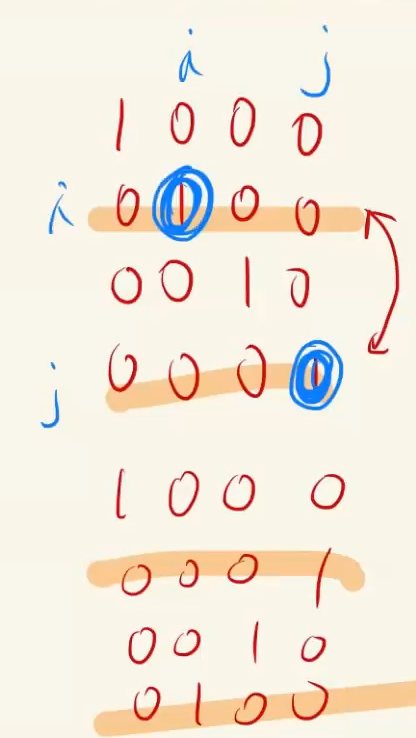

In [51]:
def switch_rows(A,i,j):
    "Switch rows i and j in matrix A."
    n = A.shape[0]
    E = np.eye(n)
    E[i,i] = 0
    E[j,j] = 0
    E[i,j] = 1
    E[j,i] = 1
    return E @ A

In [52]:
A = np.array([[1,1,1],[1,-1,0],[10,20,30]])
print(A)

[[ 1  1  1]
 [ 1 -1  0]
 [10 20 30]]


In [53]:
switch_rows(A,0,1)

array([[ 1., -1.,  0.],
       [ 1.,  1.,  1.],
       [10., 20., 30.]])

In [61]:
#HW gaussian elimination
B=np.array([1,2,3,2,5,3,1,0,8.0]).reshape([3,3])
I3=np.eye(3)
A0=np.hstack([B,I3])

A1=add_row(A0,1,0,-2)
print(A1)

[[ 1.  2.  3.  1.  0.  0.]
 [ 0.  1. -3. -2.  1.  0.]
 [ 1.  0.  8.  0.  0.  1.]]


In [64]:
A2=add_row(A1,2,0,-1)
print(A2)

[[ 1.  2.  3.  1.  0.  0.]
 [ 0.  1. -3. -2.  1.  0.]
 [ 0. -2.  5. -1.  0.  1.]]


In [65]:
A3=add_row(A2,2,1,2)
print(A3)

[[ 1.  2.  3.  1.  0.  0.]
 [ 0.  1. -3. -2.  1.  0.]
 [ 0.  0. -1. -5.  2.  1.]]


In [67]:
A4=add_row(A3,1,2,-3)
print(A4)

[[ 1.  2.  3.  1.  0.  0.]
 [ 0.  1.  0. 13. -5. -3.]
 [ 0.  0. -1. -5.  2.  1.]]


In [69]:
A5=add_row(A4,0,2,3)
print(A5)

[[  1.   2.   0. -14.   6.   3.]
 [  0.   1.   0.  13.  -5.  -3.]
 [  0.   0.  -1.  -5.   2.   1.]]


In [70]:
A6=add_row(A5,0,1,-2)
print(A6)

[[  1.   0.   0. -40.  16.   9.]
 [  0.   1.   0.  13.  -5.  -3.]
 [  0.   0.  -1.  -5.   2.   1.]]


In [73]:
A7=scale_row(A6,2,-1)
print(A7)

[[  1.   0.   0. -40.  16.   9.]
 [  0.   1.   0.  13.  -5.  -3.]
 [  0.   0.   1.   5.  -2.  -1.]]


여기까지

## Examples

### Find the Inverse

Let's apply our functions to the augmented matrix $[M \ | \ I]$ to find the inverse of the matrix $M$:

In [ ]:
import numpy as np

In [ ]:
M = np.array([[5,4,2],[-1,2,1],[1,1,1]])
print(M)

[[ 5  4  2]
 [-1  2  1]
 [ 1  1  1]]


In [ ]:
A = np.hstack([M,np.eye(3)])
print(A)

[[ 5.  4.  2.  1.  0.  0.]
 [-1.  2.  1.  0.  1.  0.]
 [ 1.  1.  1.  0.  0.  1.]]


In [ ]:
A1 = switch_rows(A,0,2)
print(A1)

[[ 1.  1.  1.  0.  0.  1.]
 [-1.  2.  1.  0.  1.  0.]
 [ 5.  4.  2.  1.  0.  0.]]


In [ ]:
A2 = add_row(A1,1,1,0)
print(A2)

[[1. 1. 1. 0. 0. 1.]
 [0. 3. 2. 0. 1. 1.]
 [5. 4. 2. 1. 0. 0.]]


In [ ]:
A3 = add_row(A2,-5,2,0)
print(A3)

[[ 1.  1.  1.  0.  0.  1.]
 [ 0.  3.  2.  0.  1.  1.]
 [ 0. -1. -3.  1.  0. -5.]]


In [ ]:
A4 = switch_rows(A3,1,2)
print(A4)

[[ 1.  1.  1.  0.  0.  1.]
 [ 0. -1. -3.  1.  0. -5.]
 [ 0.  3.  2.  0.  1.  1.]]


In [ ]:
A5 = scale_row(A4,-1,1)
print(A5)

[[ 1.  1.  1.  0.  0.  1.]
 [ 0.  1.  3. -1.  0.  5.]
 [ 0.  3.  2.  0.  1.  1.]]


In [ ]:
A6 = add_row(A5,-3,2,1)
print(A6)

[[  1.   1.   1.   0.   0.   1.]
 [  0.   1.   3.  -1.   0.   5.]
 [  0.   0.  -7.   3.   1. -14.]]


In [ ]:
A7 = scale_row(A6,-1/7,2)
print(A7)

[[ 1.          1.          1.          0.          0.          1.        ]
 [ 0.          1.          3.         -1.          0.          5.        ]
 [ 0.          0.          1.         -0.42857143 -0.14285714  2.        ]]


In [ ]:
A8 = add_row(A7,-3,1,2)
print(A8)

[[ 1.          1.          1.          0.          0.          1.        ]
 [ 0.          1.          0.          0.28571429  0.42857143 -1.        ]
 [ 0.          0.          1.         -0.42857143 -0.14285714  2.        ]]


In [ ]:
A9 = add_row(A8,-1,0,2)
print(A9)

[[ 1.          1.          0.          0.42857143  0.14285714 -1.        ]
 [ 0.          1.          0.          0.28571429  0.42857143 -1.        ]
 [ 0.          0.          1.         -0.42857143 -0.14285714  2.        ]]


In [ ]:
A10 = add_row(A9,-1,0,1)
print(A10)

[[ 1.          0.          0.          0.14285714 -0.28571429  0.        ]
 [ 0.          1.          0.          0.28571429  0.42857143 -1.        ]
 [ 0.          0.          1.         -0.42857143 -0.14285714  2.        ]]


Let's verify that we found the inverse $M^{-1}$ correctly:

In [ ]:
Minv = A10[:,3:]
print(Minv)

[[ 0.14285714 -0.28571429  0.        ]
 [ 0.28571429  0.42857143 -1.        ]
 [-0.42857143 -0.14285714  2.        ]]


In [ ]:
result = Minv @ M
print(result)

[[ 1.00000000e+00  4.44089210e-16  2.22044605e-16]
 [-6.66133815e-16  1.00000000e+00 -2.22044605e-16]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]


Success! We can see the result more clearly if we round to 15 decimal places:

In [ ]:
np.round(result,15)

array([[ 1.e+00,  0.e+00,  0.e+00],
       [-1.e-15,  1.e+00, -0.e+00],
       [ 0.e+00,  0.e+00,  1.e+00]])

### Solve a System

Let's use our functions to perform Gaussian elimination and solve a linear system of equations $A \mathbf{x} = \mathbf{b}$.

In [ ]:
A = np.array([[6,15,1],[8,7,12],[2,7,8]])
print(A)

[[ 6 15  1]
 [ 8  7 12]
 [ 2  7  8]]


In [ ]:
b = np.array([[2],[14],[10]])
print(b)

[[ 2]
 [14]
 [10]]


Form the augemented matrix $M$:

In [ ]:
M = np.hstack([A,b])
print(M)

[[ 6 15  1  2]
 [ 8  7 12 14]
 [ 2  7  8 10]]


Perform row operations:

In [ ]:
M1 = scale_row(M,1/6,0)
print(M1)

[[ 1.          2.5         0.16666667  0.33333333]
 [ 8.          7.         12.         14.        ]
 [ 2.          7.          8.         10.        ]]


In [ ]:
M2 = add_row(M1,-8,1,0)
print(M2)

[[  1.           2.5          0.16666667   0.33333333]
 [  0.         -13.          10.66666667  11.33333333]
 [  2.           7.           8.          10.        ]]


In [ ]:
M3 = add_row(M2,-2,2,0)
print(M3)

[[  1.           2.5          0.16666667   0.33333333]
 [  0.         -13.          10.66666667  11.33333333]
 [  0.           2.           7.66666667   9.33333333]]


In [ ]:
M4 = scale_row(M3,-1/13,1)
print(M4)

[[ 1.          2.5         0.16666667  0.33333333]
 [ 0.          1.         -0.82051282 -0.87179487]
 [ 0.          2.          7.66666667  9.33333333]]


In [ ]:
M5 = add_row(M4,-2,2,1)
print(M5)

[[ 1.          2.5         0.16666667  0.33333333]
 [ 0.          1.         -0.82051282 -0.87179487]
 [ 0.          0.          9.30769231 11.07692308]]


In [ ]:
M6 = scale_row(M5,1/M5[2,2],2)
print(M6)

[[ 1.          2.5         0.16666667  0.33333333]
 [ 0.          1.         -0.82051282 -0.87179487]
 [ 0.          0.          1.          1.19008264]]


In [ ]:
M7 = add_row(M6,-M6[1,2],1,2)
print(M7)

[[1.         2.5        0.16666667 0.33333333]
 [0.         1.         0.         0.1046832 ]
 [0.         0.         1.         1.19008264]]


In [ ]:
M8 = add_row(M7,-M7[0,2],0,2)
print(M8)

[[1.         2.5        0.         0.13498623]
 [0.         1.         0.         0.1046832 ]
 [0.         0.         1.         1.19008264]]


In [ ]:
M9 = add_row(M8,-M8[0,1],0,1)
print(M9)

[[ 1.          0.          0.         -0.12672176]
 [ 0.          1.          0.          0.1046832 ]
 [ 0.          0.          1.          1.19008264]]


Success! The solution of $Ax=b$ is

In [ ]:
x = M9[:,3].reshape(3,1)
print(x)

[[-0.12672176]
 [ 0.1046832 ]
 [ 1.19008264]]


Or, we can do it the easy way...

In [ ]:
x = la.solve(A,b)
print(x)

[[-0.12672176]
 [ 0.1046832 ]
 [ 1.19008264]]


## `scipy.linalg.solve`

We are mostly interested in linear systems $A \mathbf{x} = \mathbf{b}$ where there is a unique solution $\mathbf{x}$. This is the case when $A$ is a square matrix ($m=n$) and $\mathrm{det}(A) \not= 0$. To solve such a system, we can use the function [`scipy.linalg.solve`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve.html).

The function returns a solution of the system of equations $A \mathbf{x} = \mathbf{b}$. For example:

In [ ]:
import scipy.linalg as la

In [ ]:
A = np.array([[1,1],[1,-1]])
print(A)

[[ 1  1]
 [ 1 -1]]


In [ ]:
b1 = np.array([[2],[0]])
print(b1)

[[2]
 [0]]


And solve:

In [ ]:
x1 = la.solve(A,b1)
print(x1)

[[1.]
 [1.]]


Note that the output $\mathbf{x}$ is returned as a 1D NumPy array when the vector $\mathbf{b}$ (the right hand side) is entered as a 1D NumPy array. If we input $\mathbf{b}$ as a 2D NumPy array, then the output is a 2D NumPy array. For example:

In [ ]:
A = np.array([[1,1],[1,-1]])
b2 = np.array([2,0]).reshape(2,1)
x2 = la.solve(A,b2)
print(x2)

[[1.]
 [1.]]


Finally, if the right hand side $\mathbf{b}$ is a matrix, then the output is a matrix of the same size. It is the solution of $A \mathbf{x} = \mathbf{b}$ when $\mathbf{b}$ is a matrix. For example:

In [ ]:
A = np.array([[1,1],[1,-1]])
b3 = np.array([[2,2],[0,1]])
x3 = la.solve(A,b3)
print(x3)

[[1.  1.5]
 [1.  0.5]]


### Simple Example

Let's compute the solution of the system of equations

\begin{align}
2x + y &= 1 \\\
x + y &= 1
\end{align}

Create the matrix of coefficients:

In [ ]:
A = np.array([[2,1],[1,1]])
print(A)

[[2 1]
 [1 1]]


And the vector $\mathbf{b}$:

In [ ]:
b = np.array([1,-1]).reshape(2,1)
print(b)

[[ 1]
 [-1]]


And solve:

In [ ]:
x = la.solve(A,b)
print(x)

[[ 2.]
 [-3.]]


We can verify the solution by computing the inverse of $A$:

In [ ]:
Ainv = la.inv(A)
print(Ainv)

[[ 1. -1.]
 [-1.  2.]]


And multiply $A^{-1} \mathbf{b}$ to solve for $\mathbf{x}$:

In [ ]:
x = Ainv @ b
print(x)

[[ 2.]
 [-3.]]


We get the same result. Success!

# Elementary row matrix

Define a elementary row matrix $E\in M_{n\times n}$ defined by $i\in J_n$ and $a=(a_1, \cdots, a_n)$ for $a_i\in \mathbb{R}$.

In [ ]:
def def_elementary_sub(i,a):
  n=len(a)
  E=np.eye(n)
  temp=0
  for j in range(n):
    temp=temp+a[j]*E[j,:]
  E[i-1,:]=temp
  return E

In [ ]:
def_elementary_sub(2, [0,2,1])

array([[1., 0., 0.],
       [0., 2., 1.],
       [0., 0., 1.]])

In [ ]:
def def_elementary_swap(i,j, n):
  E=np.eye(n)
  E[[i-1, j-1]] = E[[j-1, i-1]]
  return E

In [ ]:
def_elementary_swap(2, 3, 4)

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.]])